In [ ]:
%load_ext autoreload
%autoreload 2
# %reload_ext lab_black
%matplotlib inline

In [14]:
%load_ext autoreload
%autoreload 2
# %reload_ext lab_black
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd <put_your_path_to_the_project_here>

[Errno 2] No such file or directory: 'drive/My Drive/ML_EPFL/'
/content/drive/My Drive/ML_EPFL


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


from keras.callbacks import Callback
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    LearningRateScheduler,
    ReduceLROnPlateau,
    EarlyStopping,
    TensorBoard,
)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2
from tensorflow.compat.v2.keras.layers import BatchNormalization
from tensorflow.python.client import device_lib
from utils import *
from models.cnn import *

Using TensorFlow backend.


In [5]:
np.random.seed(8)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17972120363416876124
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15597721349114775915
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13919056416948921352
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2649883283409126915
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


# Loading images

In [6]:
image_dir_train = "data/training/images/"
files = os.listdir(image_dir_train)
n_train = len(files)
print(f"Loading training images, images loaded: {n_train} ")
imgs_train = np.asarray([load_img(image_dir_train + files[i]) for i in range(n_train)])
gt_dir_train = "data/training/groundtruth/"
print(f"Loading groundtruth images, images loaded: {n_train} ")
gt_imgs_train = np.asarray([load_img(gt_dir_train + files[i]) for i in range(n_train)])

Loading training images, images loaded: 100 
Loading groundtruth images, images loaded: 100 


In [ ]:
X_train, Y_train = imag_rotation_aug(imgs_train, gt_imgs_train)

In [ ]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [9]:
print(X_train.shape)
print(Y_train.shape)
n_train = Y_train.shape[0]

(900, 448, 448, 3)
(900, 448, 448)


In [10]:
# We define parameters of the model
BATCH_SIZE = 1200
WINDOW_SIZE = 64
PATCH_SIZE = 16
EPOCHS = 200
STEPS_PER_EPOCH = 100
WIDTH = 448
model = CNN(
    shape=(WINDOW_SIZE, WINDOW_SIZE, 3),
    BATCH_SIZE=BATCH_SIZE,
    WINDOW_SIZE=WINDOW_SIZE,
    PATCH_SIZE=PATCH_SIZE,
    EPOCHS=EPOCHS,
    STEPS_PER_EPOCH=STEPS_PER_EPOCH,
    WIDTH=WIDTH,
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
leaky_re_lu_1

In [11]:
history = model.train(X_train, Y_train, n_train)
model.save("best_cnn.h5")

Epoch 1/200
 99/100 [============================>.] - ETA: 0s - loss: 0.5355 - acc: 0.7517 - recall: 0.7517 - f1: 0.7518
Epoch 00001: loss improved from inf to 0.53499, saving model to saved_models/CNN_dropout_0.25_1024-001-0.751717.h5
100/100 [==============================] - 41s 413ms/step - loss: 0.5350 - acc: 0.7517 - recall: 0.7517 - f1: 0.7517
Epoch 2/200
 99/100 [============================>.] - ETA: 0s - loss: 0.5061 - acc: 0.7535 - recall: 0.7535 - f1: 0.7536
Epoch 00002: loss improved from 0.53499 to 0.50543, saving model to saved_models/CNN_dropout_0.25_1024-002-0.753999.h5
100/100 [==============================] - 35s 347ms/step - loss: 0.5054 - acc: 0.7539 - recall: 0.7539 - f1: 0.7540
Epoch 3/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4683 - acc: 0.7706 - recall: 0.7704 - f1: 0.7706
Epoch 00003: loss improved from 0.50543 to 0.46892, saving model to saved_models/CNN_dropout_0.25_1024-003-0.770607.h5
100/100 [==============================] - 35s 

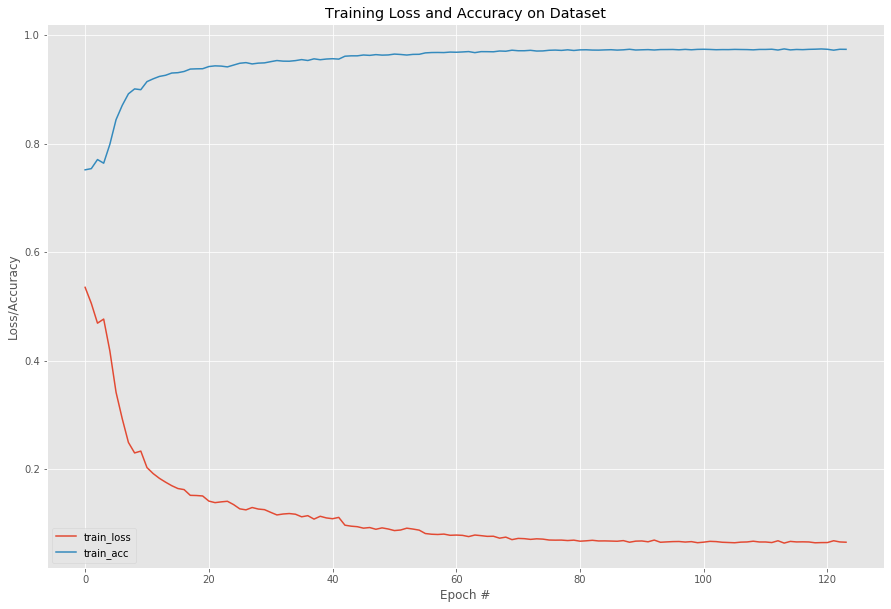

In [16]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("CNN_dropout_0.25_1024.pdf")
plt.show()

In [17]:
model = CNN(
    shape=(WINDOW_SIZE, WINDOW_SIZE, 3),
    BATCH_SIZE=BATCH_SIZE,
    WINDOW_SIZE=WINDOW_SIZE,
    PATCH_SIZE=PATCH_SIZE,
    EPOCHS=EPOCHS,
    STEPS_PER_EPOCH=STEPS_PER_EPOCH,
    WIDTH=WIDTH,
)
model.load("best_cnn.h5")
image_filenames = []
for i in range(1, 51):
    image_filename = "data/test_set_images/test_" + str(i) + "/test_" + str(i) + ".png"
    image_filenames.append(image_filename)

submission_filename = "best_cnn.csv"
generate_submission(model, submission_filename, *image_filenames)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)      